## Möbiusova traka

***

### Uvod

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.tri import Triangulation

### Svojstva

Möbiusova traka dobivena je rezanjem vrcpe, jednim njenim zavojem, te spajanjem ta dva kraja vrpce.



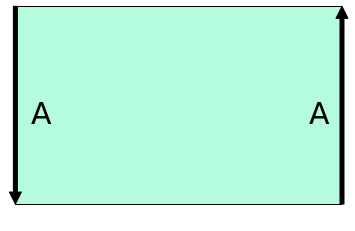

In [370]:
fig, ax = plt.subplots()
plt.axis("off")

ax.set_xlim(-0.1, 4)
ax.set_ylim(-0.1, 1)

rect = pat.Rectangle((0,0), width=4, height=1, facecolor="#B5FBDD", edgecolor="black")
ax.add_patch(rect)

ax.annotate("", xy=(0, 0), xytext=(0, 1), arrowprops=dict(facecolor='black'))
ax.annotate("", xy=(4, 1), xytext=(4, 0), arrowprops=dict(facecolor='black'))

ax.text(0.1, 0.5, 'A', horizontalalignment='center', verticalalignment='center', 
        fontsize=30, color='black', transform=ax.transAxes)
ax.text(0.93, 0.5, 'A', horizontalalignment='center', verticalalignment='center', 
        fontsize=30, color='black', transform=ax.transAxes)

plt.show()

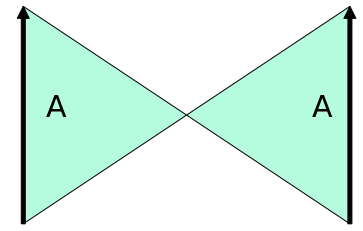

In [371]:
fig2, ax2 = plt.subplots()

ax2.set_xlim(-0.1, 4)
ax2.set_ylim(0, 1)

tocke1 = np.array([ [0,0], [0,1] , [2,0.5] ])
trokut1 = pat.Polygon(tocke1, True, facecolor="#B5FBDD", edgecolor="black")
tocke2 = np.array([ [4,0], [4,1] , [2,0.5] ])
trokut2 = pat.Polygon(tocke2, True, facecolor="#B5FBDD", edgecolor="black")

ax2.add_patch(trokut1)
ax2.add_patch(trokut2)

ax2.annotate("", xy=(0, 1), xytext=(0, 0), arrowprops=dict(facecolor='black'))
ax2.annotate("", xy=(4, 1), xytext=(4, 0), arrowprops=dict(facecolor='black'))

ax2.text(0.007, 0.4, 'A', horizontalalignment='center', verticalalignment='center', 
        fontsize=30, color='black', transform=ax.transAxes)
ax2.text(0.8, 0.4, 'A', horizontalalignment='center', verticalalignment='center', 
        fontsize=30, color='black', transform=ax.transAxes)


plt.axis("off")
plt.show()

Rezanjem Möbiusove trake po sredini dobiva se jedna duža traka sa dva puna zavoja, a ne dvije odvojene trake, kao što bi se očekivalo. Dobivena traka nije Möbiusova.

Sa druge strane, ako se Möbiusova traka reže ne po sredini, već na udaljenosti od jedne trećine svoje širine do ruba, rezultat će biti dvije trake. Jedna traka je kraća i Möbiusova, dok duža traka sadrži dva zavoja (nije Möbiusova), no ona je ona rezultat rezanja početne Möbiusove trake po sredini.


<img src="mobius_half.gif" width="400" align="center">

<img src="mobius_three.gif" width="400" align="center">

Općenito, dodavanjem još zavoja i spajanjem krajeva dobivaju se figure koje se nazivaju paradromski prsteni. Tablica prikazuje rezultate za neke brojeve zavoja, rezova i dijelova za koje se vrpca reže.

In [373]:
tablica = pd.read_csv("prstenovi.csv")
tablica.style.set_table_styles([dict(selector='td', props=[('text-align', 'center'), ('background-color', '#FFE0BC')]),
                         dict(selector=('th'), props=[('text-align', 'center'), ('background-color', '#FEAC92')])]).hide_index()

Zavoji,Rezovi,Dijelovi,Rezultat
1,1,2,1 vrpca duljine 2 i 1 Mobiusova vrpca duljine 1
1,2,4,2 vrpce duljine 2
1,2,5,2 vrpce duljine 2 i 1 Möbiusova vrpca duljine 1
1,3,6,3 vrpce duljine 2
1,3,7,3 vrpce duljine 2 i 1 Möbiusova vrpca duljine 1
2,1,2,2 vrpce duljine 1
2,2,3,3 vrpce duljine 1
2,3,4,4 vrpce duljine 1


### 3D Möbius

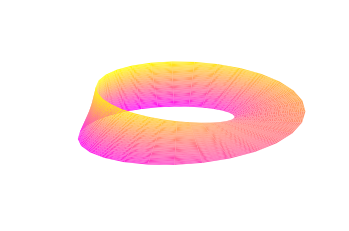

In [368]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.4, 0.4, 40)
w, theta = np.meshgrid(w, theta)
phi = 0.5 * theta

r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap='spring', linewidths=0.4)

plt.axis("off")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.show()